In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only consider the first two features.
y = iris.target

Text(0, 0.5, 'Sepal width')

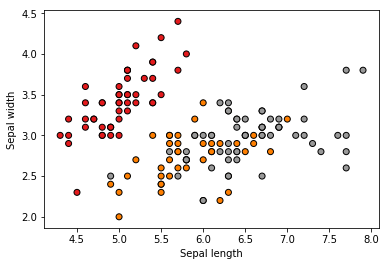

In [2]:
#Scatter plot with actual assignments
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [3]:
#run K-means
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)

In [12]:
assignArray = kmeans.predict(X)
print(assignArray)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [13]:
#Create an assignment array with the same color mapping for easy visualization
assignments = []
for index in assignArray:
    if index == 0:
        assignments.append("orange")
    elif index == 1:
        assignments.append("red")
    elif index == 2:
        assignments.append("grey")
    else:
        print("Class out of bounds")

Text(0, 0.5, 'Sepal width')

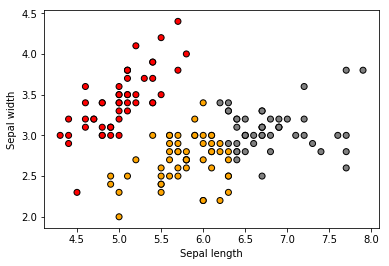

In [5]:
#Plot the results
plt.scatter(X[:, 0], X[:, 1], c=assignments,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

Some nice looking clusters!

Well we've figured out how to use scikitlearn's built in K-means algorithm. Let's try to imlement our own for practice!

In [6]:
#a class which stores its array and cluster membership
class data:
    def __init__(self, array):
        self.array = array
        self.assignment = None

In [7]:
from random import randrange
from numpy.linalg import norm
import numpy as np

#Check this out for your HW! -> K-means++ https://en.wikipedia.org/wiki/K-means%2B%2B
def myKmeans(K,X):
    dataList = []
    N = len(X)
    
    #Initialize data objects
    for point in X:
        dataList.append(data(point))

    #Initialize centroids (change this for HW)
    centroids = []
    for i in range(K):
        randInt = randrange(N)
        centroids.append(dataList[randInt].array)
    #print(centroids)
        
    while True:
        for dataPoint in dataList:
            dist = []
            for cen in centroids:
                dist.append(norm(dataPoint.array-cen))
                #print(dataPoint.array)
                #print(cen)
            #print(dist)
            dataPoint.assignment = np.argmin(dist)
            #print(dataPoint.assignment)
                
        numSame = 0
        for k in range(K):
            xc = np.zeros(centroids[-1].shape)
            its = 0
            for dataPoint in dataList:
                if dataPoint.assignment==k:
                    xc += dataPoint.array
                    its += 1
            #print(its)
            xc /= its
            if norm(centroids[k]-xc)<1e-6:
                numSame += 1
            else:
                centroids[k] = xc
        if numSame == K:
            return (centroids, dataList)        

In [8]:
[centroids,dataList] = myKmeans(3,X)

In [9]:
print(centroids)

[array([6.82391304, 3.07826087]), array([5.8, 2.7]), array([5.00392157, 3.4       ])]


In [11]:
myAssignments = [data.assignment for data in dataList]
print(myAssignments)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1]


In [14]:
assignArray

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

Note that our results will not necessarily be the same. Since K-means uses a random initializer, and is only guarenteed to converge locally, it is possible that we will have different clusters in the end. Another possibility is that our clusters may be the same but with permutations. Let's find a good permutation and find out.

In [20]:
myAssignsPermuted = []
for assignment in myAssignments:
    if assignment==1:
        myAssignsPermuted.append(0)
    elif assignment==2:
        myAssignsPermuted.append(1)
    elif assignment==0:
        myAssignsPermuted.append(2)

matching = []
numFalse = 0
for i in range(len(assignArray)):
    if assignArray[i] == myAssignsPermuted[i]:
        matching.append(True)
    else:
        matching.append(False)
        numFalse += 1

print(numFalse)
print(matching)

150
2
[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


Looks like we got it! Only 2/150 were classified differently.